### Importing the libraries

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [292]:
data = pd.read_csv("/content/hr_dataset.csv")

In [293]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [294]:
data.shape

(14999, 10)

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [296]:
data.isna().sum()  #checking null values

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [297]:
data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [298]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


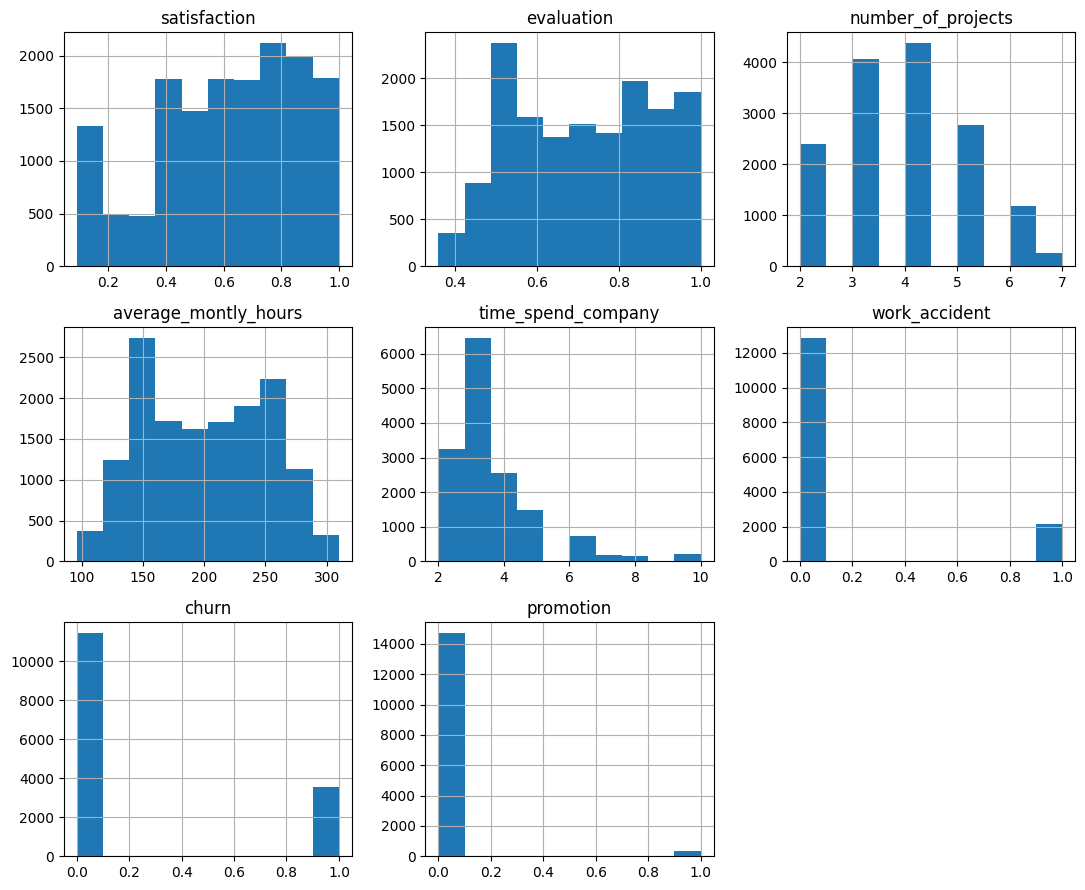

In [299]:
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(11,9))
plt.tight_layout()
plt.show()

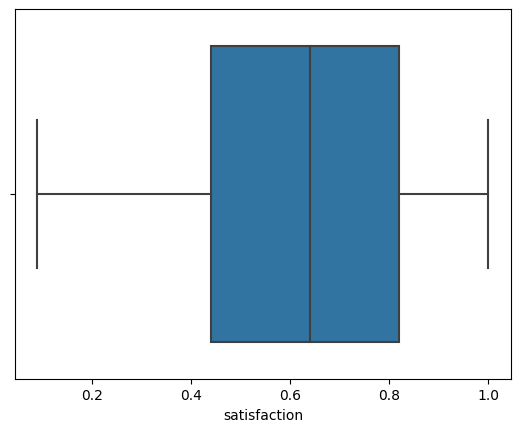

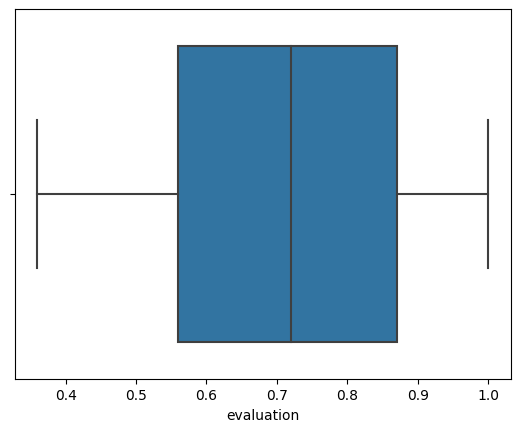

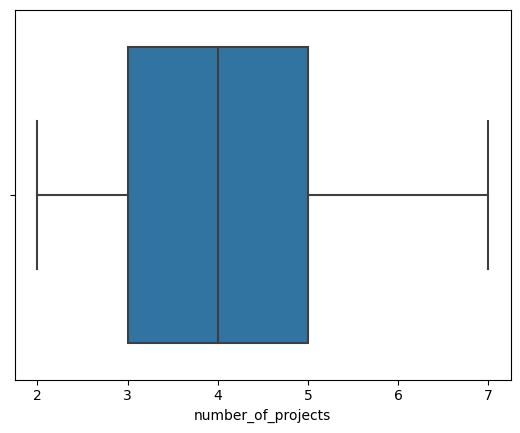

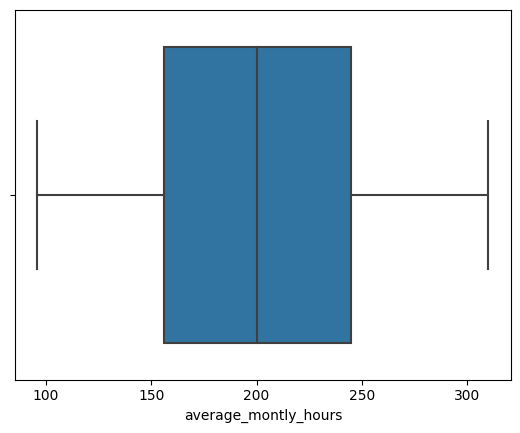

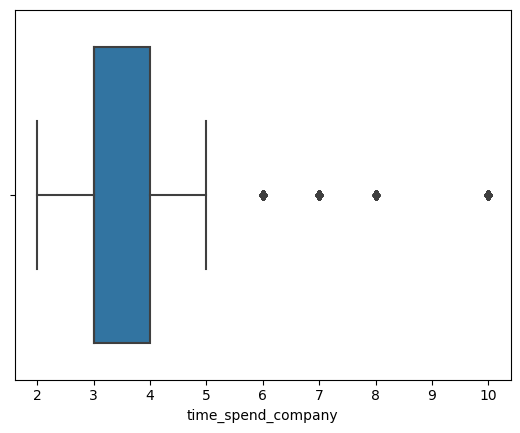

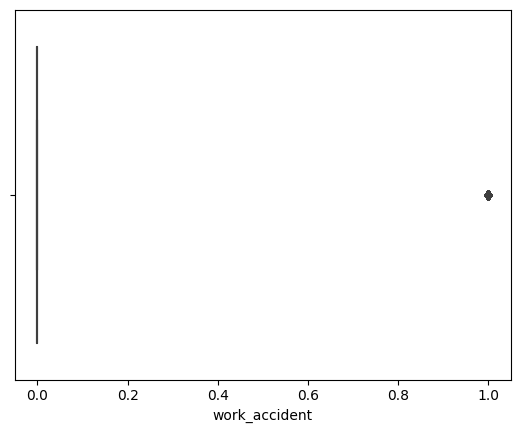

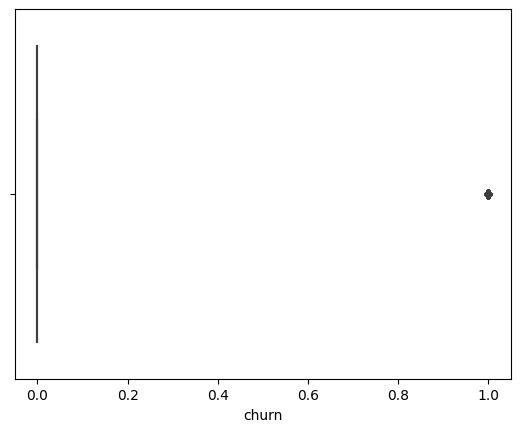

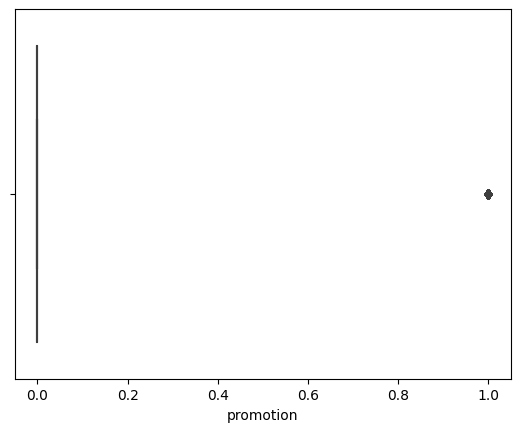

In [300]:
for i in ['satisfaction',	'evaluation',	'number_of_projects',	'average_montly_hours',	'time_spend_company',	'work_accident',	'churn',	'promotion']:
  sns.boxplot(x=data[i])
  plt.show()

In [301]:
x = data.drop("churn", axis=1)
y = data['churn']

In [302]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Encoding

In [303]:
from sklearn.preprocessing import LabelEncoder # label encoding
le = LabelEncoder()

In [304]:
le.classes_ = np.array(["low","medium","high"])

In [305]:
le.classes_

array(['low', 'medium', 'high'], dtype='<U6')

In [306]:
x.loc[:,"salary"] = le.transform(x['salary'])

<ipython-input-306-9e258c871d35>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,"salary"] = le.transform(x['salary'])


In [307]:
x["salary"] = le.fit_transform(x['salary'])


In [308]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
0,0.38,0.53,2,157,3,0,0,sales,0
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1
3,0.72,0.87,5,223,5,0,0,sales,0
4,0.37,0.52,2,159,3,0,0,sales,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,0
14995,0.37,0.48,2,160,3,0,0,support,0
14996,0.37,0.53,2,143,3,0,0,support,0
14997,0.11,0.96,6,280,4,0,0,support,0


In [309]:
x = pd.get_dummies(x) #one-hot encoding

In [310]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [311]:
x.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [312]:
from sklearn.model_selection import train_test_split

In [313]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 134)

## Modelling

## 1. Logistic Regression

In [314]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [315]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [316]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.7936666666666666
precision is : 0.7170371796921556
recall is : 0.646518740291335
F1 score is : 0.6650504796163286


In [317]:
t=[]
t.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [318]:
confusion_matrix(y_test, y_pred)

array([[2120,  167],
       [ 452,  261]])

# Scaling the data

In [319]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [320]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)

In [321]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.7946666666666666
precision is : 0.7197317648059669
recall is : 0.6457267156088655
F1 score is : 0.6646448574522881


In [322]:
confusion_matrix(y_test, y_pred)

array([[2126,  161],
       [ 455,  258]])

## 2. KNN

In [323]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [324]:
confusion_matrix(y_test, y_pred)

array([[2189,   98],
       [ 104,  609]])

In [325]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9326666666666666
precision is : 0.9080153545228051
recall is : 0.9056432755172691
F1 score is : 0.9068208376898947


In [326]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [327]:
acc_values

[0.9496666666666667,
 0.9436666666666667,
 0.936,
 0.946,
 0.941,
 0.9416666666666667,
 0.9383333333333334,
 0.9366666666666666,
 0.9326666666666666,
 0.934,
 0.9316666666666666,
 0.9336666666666666]

Text(0, 0.5, 'accuracy')

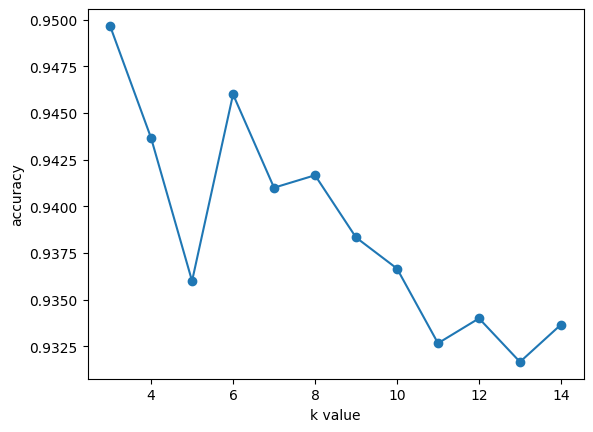

In [328]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [329]:
classifier=KNeighborsClassifier(n_neighbors=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [330]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.961
precision is : 0.948325559944359
recall is : 0.9435319824043575
F1 score is : 0.945898247087792


In [331]:
t.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 3. Linear SVM

In [332]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [333]:

print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.7776666666666666
precision is : 0.6872865928427249
recall is : 0.5974138232377528
F1 score is : 0.6088098141230801


In [334]:
t.append(['SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


##4. Polynomial SVM

In [335]:
svm_poly=SVC(kernel='poly', degree=3)

In [336]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.7776666666666666
precision is : 0.6872865928427249
recall is : 0.5974138232377528
F1 score is : 0.6088098141230801


In [337]:
t.append(['polynomial svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 5. Decision Tree Classifier

In [338]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9796666666666667


In [339]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9796666666666667
precision is : 0.9668884288312378
recall is : 0.9779763171434861
F1 score is : 0.9722752435044153


In [340]:
confusion_matrix(y_test, y_pred)

array([[2244,   43],
       [  18,  695]])

In [341]:
t.append(['Decision Tree Clssifier',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


K-fold cross validation

In [342]:
### k fold cross validation

In [343]:
from sklearn.model_selection import cross_val_score

In [344]:
cv_scores = cross_val_score(dt , x_train, y_train, cv = 5)

In [345]:
cv_scores

array([0.97875   , 0.97541667, 0.97875   , 0.97541667, 0.97373906])

In [346]:
cv_scores.mean()

0.9764144782548284

### Cross validation score is .977

In [347]:
df = pd.DataFrame(t, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.66505,0.79367,0.71704,0.64652
1,KNN,0.94590,0.96100,0.94833,0.94353
2,SVM,0.60881,0.77767,0.68729,0.59741
3,polynomial svm,0.60881,0.77767,0.68729,0.59741
4,Decision Tree Clssifier,0.97228,0.97967,0.96689,0.97798


In [348]:
v = pd.DataFrame({ 'Test Data' : y_test, 'Predicted Data': y_pred,})
v.sample(5)

,Test Data,Predicted Data
9409,0,0
6062,0,0
1467,1,1
9456,0,0
6968,0,0


## Conclusion

After passing through different models, accuracy of Desicision tree classifier is high as compared to others. Therefore, **Decision Tree Classifier** is choosen as the best model for HR Dataset